In [552]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
from datetime import datetime
from ast import literal_eval
import re
from sklearn.ensemble import GradientBoostingRegressor
import clean
%autoreload
import regression_helpers

In [559]:
insta_df = pd.read_csv('data/data.csv', index_col=0)


In [560]:
cleaned_insta_df = clean.clean_instagram_post_data(insta_df)

In [562]:
cleaned_insta_df.head()

,caption,commenters,comments,hashtags,number_of_comments,number_of_likes,people_tagged,taken_at,url,date,num_people_tagged,year,month,day,hour,DOW,num_posts
0,SHOP LOCAL 🌈 @pioneersboardshop @cinnamonrai...,"[nolongersauced, thedriftcollective]","[I <3 bethel skatepark, .\n.\n.\n.\n.\n#summer...",[],2,300,"[nolongersauced, pioneersboardshop, cinnamonra...",1515166569,http://www.instagram.com/p/BdkrH7uHkpr/?taken-...,20180105,8,2018,1,5,15,4,1
1,Snow day 🍻 Shop will reopen tomorrow at noon! ...,"[wyndhamvacationrentals, demetriusortakales, h...",[We'd love to feature your photo! Can we shar...,"[#summersunselection, #createexploretakeover, ...",3,468,"[rhlockhart, thedriftcollective, rhlockhart]",1515078603,http://www.instagram.com/p/BdiDVyynAdH/?taken-...,20180104,3,2018,1,4,15,3,1
2,Shop open again tomorrow! 🛷🌴 Brave the cold + ...,"[johnnyoconnor, zynenwartel, thedriftcollectiv...","[I gotta come try this on, 👌👌, @johnnyoconnor ...","[#summersunselection, #urbanstyle, #modernstyl...",6,244,[thedriftcollective],1514933720,http://www.instagram.com/p/Bddu_4Vn5pM/?taken-...,20180102,1,2018,1,2,22,1,1
3,Merry Christmas Eve ⭐️ Come celebrate and fini...,"[micky_kimm, theprosperitygirl]","[😊😄, 😊😊✌...]","[#vintagechristmas, #merrychristmaseve, #summe...",2,258,"[elisabettalockhart, sea__soul, slimaarons, sl...",1514130168,http://www.instagram.com/p/BdFyWJOnkVz/?taken-...,20171224,4,2017,12,24,15,6,1
4,🔥🔥🔥 You deserve to dress one of a kind. Our di...,"[hdcostinyamoney, veilleuxkristen, westvillage...","[Love it🤗, @hdcostinyamoney @juliiivanegas fin...","[#shopsustainable, #summersunselection, #urban...",9,296,"[hdcostinyamoney, veilleuxkristen, thedriftcol...",1514059594,http://www.instagram.com/p/BdDrvIOn_nk/?taken-...,20171223,5,2017,12,23,20,5,1


In [571]:
insta_df_short = insta_df[['DOW','num_people_tagged', 'month', 'day','hour','number_of_likes']]

In [572]:
insta_df_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 6 columns):
DOW                  395 non-null int64
num_people_tagged    395 non-null int64
month                395 non-null int64
day                  395 non-null int64
hour                 395 non-null int64
number_of_likes      395 non-null int64
dtypes: int64(6)
memory usage: 21.6 KB


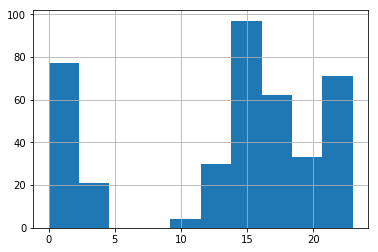

In [578]:
with_DOW_dummies['hour'].hist()

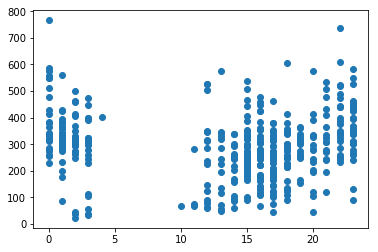

In [579]:
plt.scatter(with_DOW_dummies['hour'], with_DOW_dummies['number_of_likes'])

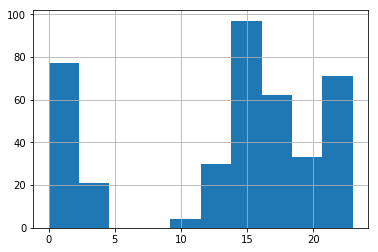

In [588]:
with_DOW_dummies['hour'].hist()

In [585]:
 = pd.get_dummies(with_DOW_dummies, columns=["hour"],drop_first=True)
13-17, ,22-24 and 0-2,  

In [594]:
with_DOW_dummies['time_frame1'] = (with_DOW_dummies['hour']>=13) & (with_DOW_dummies['hour']<=17)
with_DOW_dummies['time_frame2'] = ((with_DOW_dummies['hour']>=22) & (with_DOW_dummies['hour']<=24)) | (with_DOW_dummies['hour']< 3) 

In [576]:
with_DOW_dummies = pd.get_dummies(insta_df_short, columns=["DOW"],drop_first=True)
with_DOW_dummies.head()

,num_people_tagged,month,day,hour,number_of_likes,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
0,8,1,5,15,300,0,0,0,1,0,0
1,3,1,4,15,468,0,0,1,0,0,0
2,1,1,2,22,244,1,0,0,0,0,0
3,4,12,24,15,258,0,0,0,0,0,1
4,5,12,23,20,296,0,0,0,0,1,0


In [581]:
with_hour_dummies.head()

,DOW,num_people_tagged,month,day,number_of_likes,hour_1,hour_2,hour_3,hour_4,hour_10,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,4,8,1,5,300,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3,3,1,4,468,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,1,2,244,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,4,12,24,258,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,5,12,23,296,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
5-9 NO POSTS

In [615]:
X = with_DOW_dummies[['DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6','num_people_tagged', 'hour', 'month']]
y = with_DOW_dummies[['number_of_likes']]
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size= .10)
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
print(model.coef_)
y_hat = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_hat))

[[-22.63029595 -10.8154654  -12.88150769 -11.11284264 -31.99186255
  -14.98243757  16.59877811  -0.33076978 -16.388188  ]]


111.78715948518501

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: D

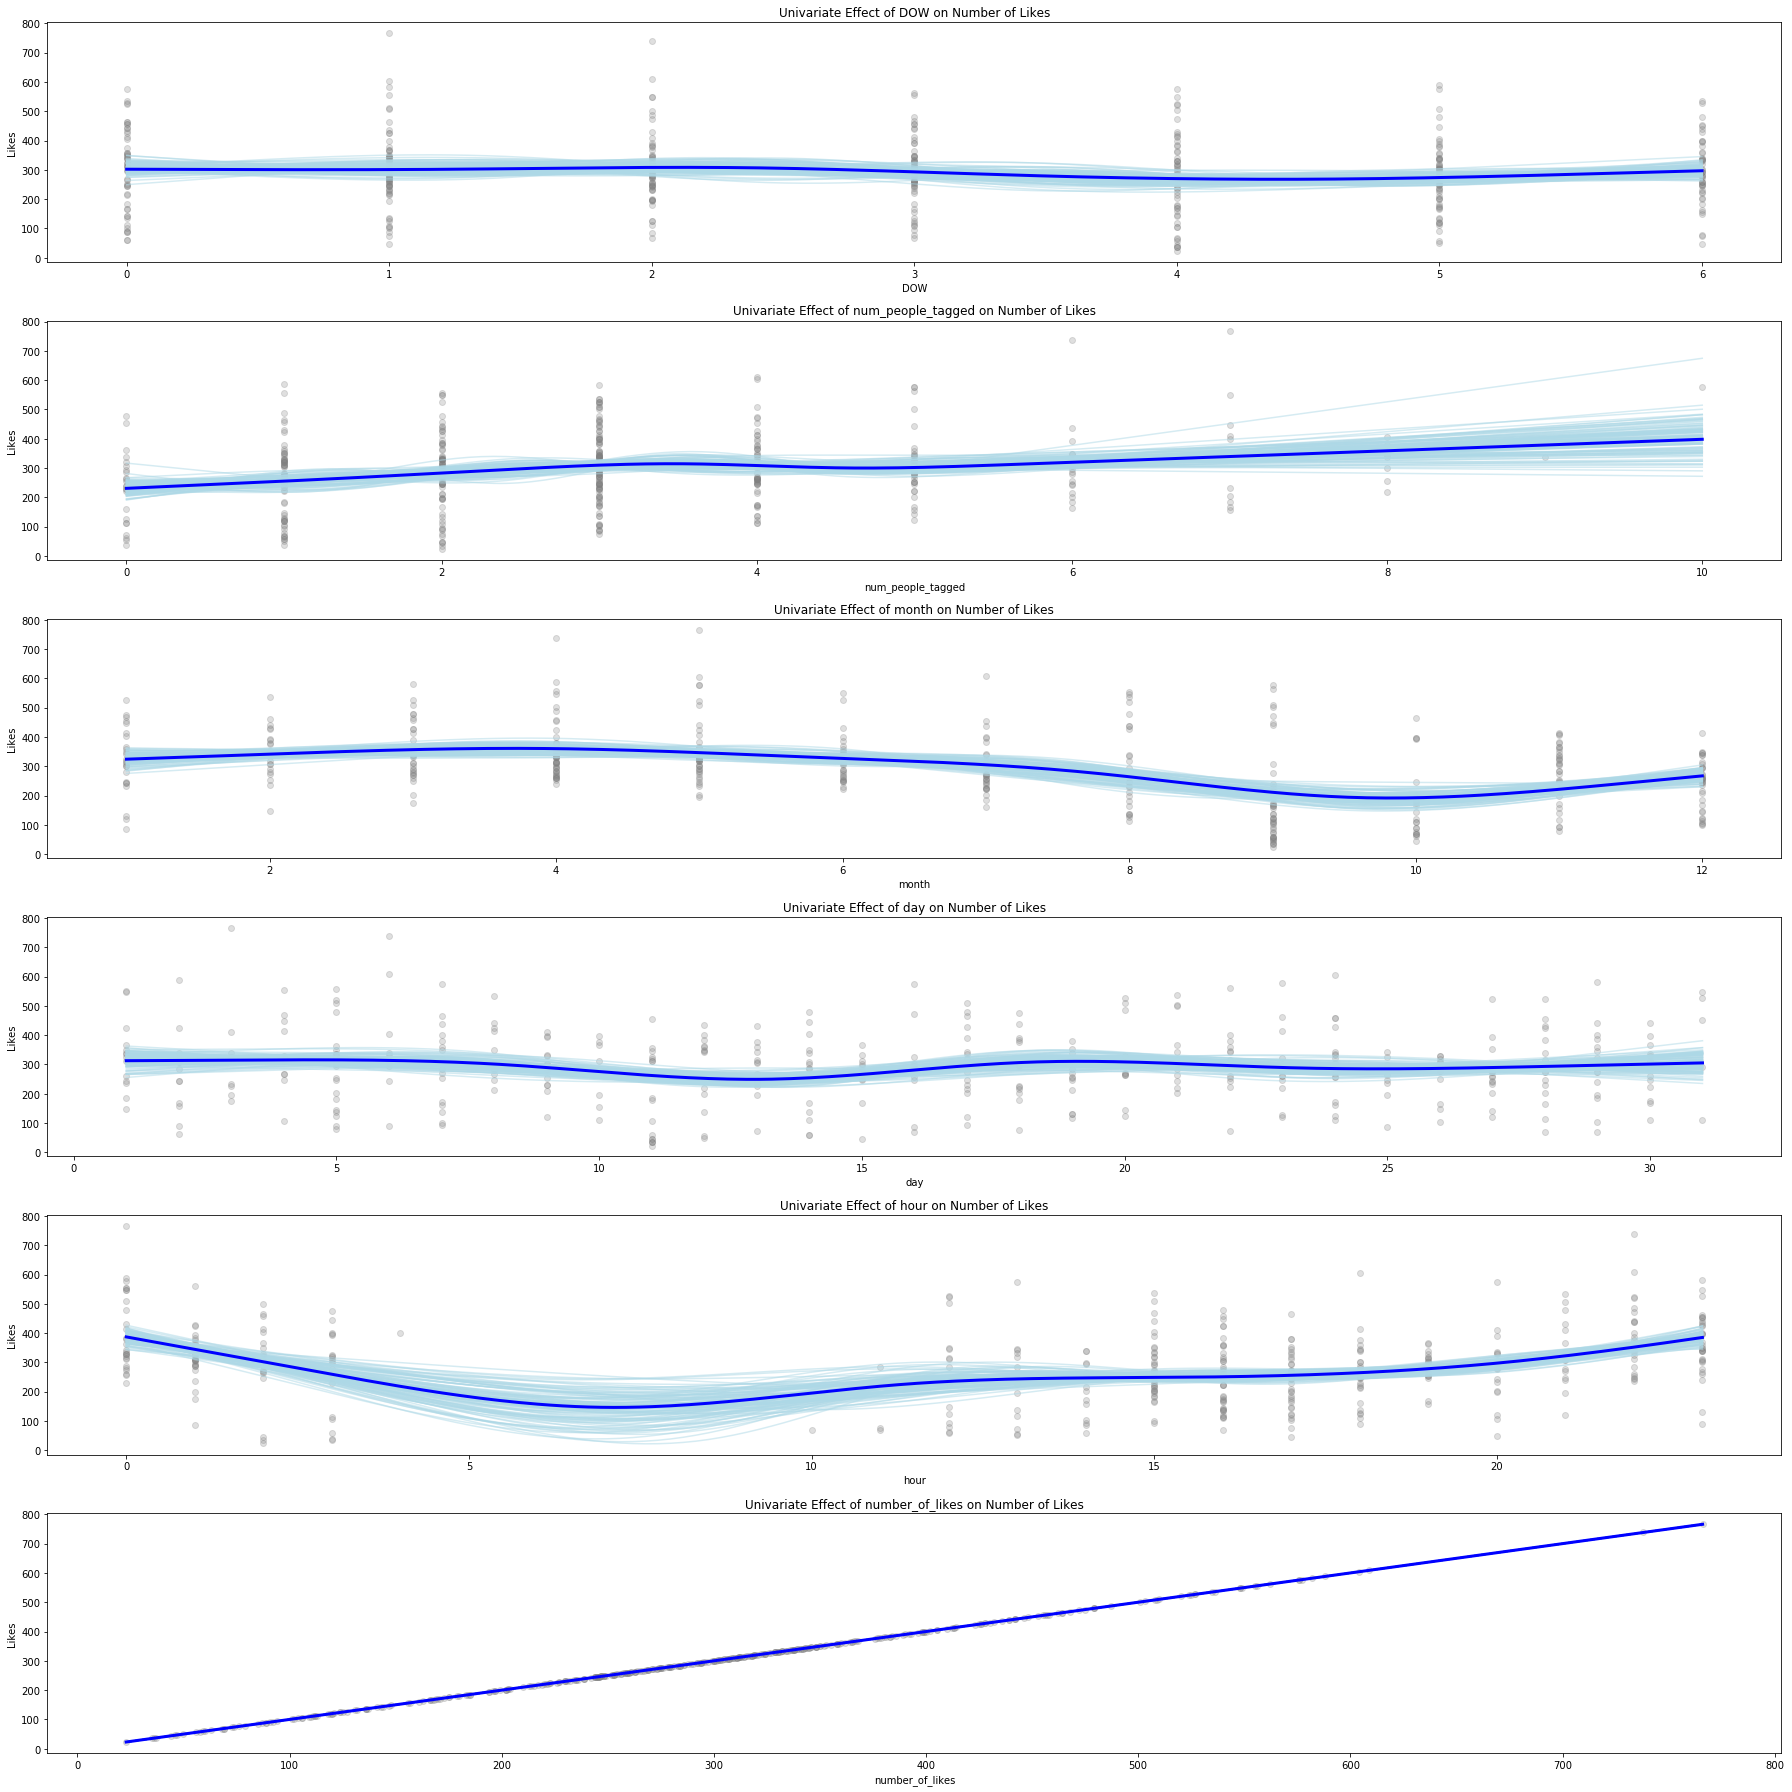

In [174]:
fig, axes = plt.subplots(6,1, figsize=(25, 25))
for name, ax, in zip(insta_df_short.columns, axes.flatten()):
    regression_helpers.plot_univariate_smooth(ax, insta_df_short[name], insta_df_short['number_of_likes'], bootstrap=100)
    ax.set_title("Univariate Effect of {} on Number of Likes".format(name))
    ax.set_ylabel("Likes")
    ax.set_xlabel(name)
fig.tight_layout()

In [ ]:
def clean_we_traffic(df):
    traffic_df['date'] = pd.to_datetime(traffic_df['Unnamed: 0'])
    traffic_df.drop('Unnamed: 0', inplace=True, axis=1)
    traffic_df= traffic_df.set_index('date')

In [564]:
traffic_df = pd.read_csv('data/web_traffic_data.csv' )

In [565]:
traffic_df['date'] = pd.to_datetime(traffic_df['Unnamed: 0'])

In [567]:
traffic_df.drop('Unnamed: 0', inplace=True, axis=1)

In [18]:
dates = [pd.to_datetime(ind) for ind in traffic_df['date']]

In [36]:
traffic_df= traffic_df.set_index('date')

In [568]:
traffic_df.head()

,Direct,Facebook,Instagram,Other,Search,total,date
0,3.0,0.0,0.0,0.0,0.0,3.0,2015-12-07
1,8.0,0.0,0.0,0.0,1.0,9.0,2015-12-08
2,8.0,0.0,0.0,0.0,0.0,8.0,2015-12-09
3,29.0,160.0,0.0,0.0,0.0,189.0,2015-12-10
4,10.0,73.0,0.0,0.0,0.0,83.0,2015-12-11


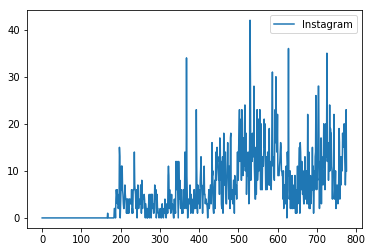

In [569]:
traffic_df[['Instagram']].plot()

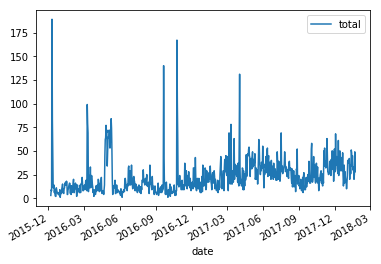

In [42]:
traffic_df[['total']].plot()

In [48]:
print(traffic_df['Instagram'].mean())
print(traffic_df['Instagram'].std())
print(traffic_df['total'].mean())
print(traffic_df['total'].std())

6.006435006435006
6.521076833883517
22.776061776061777
18.337930198224175


In [49]:
traffic_df['high_instagram_traffic'] = traffic_df['Instagram'] > 12
traffic_df['high_traffic'] = traffic_df['total'] > 40


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108856128>,
      dtype=object)

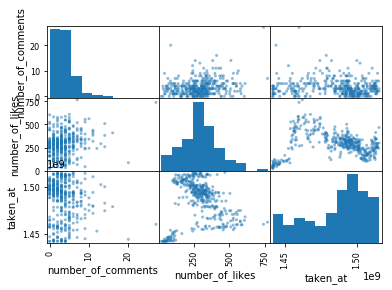

In [64]:
scatter_matrix(insta_df)

In [68]:
days_with_high_insta_traffic= traffic_df[traffic_df['high_instagram_traffic']==True]

In [71]:
days_with_high_insta_traffic.head()

,Direct,Facebook,Instagram,Other,Search,total,high_instagram_traffic,high_traffic
date,,,,,,,,
2016-06-22,11.0,0.0,15.0,0.0,6.0,32.0,True,False
2016-06-23,15.0,0.0,13.0,0.0,6.0,34.0,True,False
2016-07-30,7.0,4.0,14.0,0.0,5.0,30.0,True,False
2016-12-06,9.0,1.0,14.0,0.0,8.0,32.0,True,False
2016-12-10,6.0,1.0,34.0,1.0,1.0,43.0,True,True


In [81]:
days_with_high_insta_traffic = list(days_with_high_insta_traffic.index)

In [83]:
postdates = list(insta_df['simple_date'])

# First Shitty Model

In [184]:
data = insta_df_short.as_matrix()
X = insta_df_short[['DOW','num_people_tagged', 'month', 'day', 'hour']]
y = insta_df_short[['number_of_likes']]
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size= .15)
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
print(model.coef_)
y_hat = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_hat))

In [178]:
X = insta_df_short[['DOW','num_people_tagged', 'month', 'day', 'hour']]
y = insta_df_short[['number_of_likes']]

In [175]:
from sklearn.linear_model import LinearRegression

In [206]:
model = LinearRegression(fit_intercept=True)

In [207]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
model.coef_

array([[ -3.66983483,  16.86883053, -16.91688173,  -0.55282409,
          0.31435105]])

In [209]:
y_hat = model.predict(X_test)

In [183]:
from sklearn.model_selection import train_test_split

In [193]:
y_test;

In [194]:
from sklearn.metrics import mean_squared_error

In [238]:
np.sqrt(mean_squared_error(y_test, y_hat))

119.4849862081432

In [211]:
import basis_expansions


# Second Shitty model


In [214]:
gdbr = GradientBoostingRegressor(learning_rate=0.1, loss='ls', n_estimators=100, random_state=1)

In [215]:
gdbr.fit(X_train, y_train)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [216]:
y_hat = gdbr.predict(X_test)

In [220]:
np.sqrt(mean_squared_error(y_test, y_hat))

103.93392279532983

In [219]:
import numpy as np

In [226]:
mean = y_train.mean()

In [234]:
y_hat = mean * np.ones(shape = (60,1))

In [228]:
y_hat +

array([287.82089552])

In [237]:
np.sqrt(mean_squared_error(y_test, y_hat))

119.4849862081432

In [242]:
insta_df.head()

,caption,commenters,comments,hashtags,number_of_comments,number_of_likes,people_tagged,taken_at,url,date,num_people_tagged,year,month,day,hour,DOW
0,SHOP LOCAL 🌈 @pioneersboardshop @cinnamonrai...,"[nolongersauced, thedriftcollective]","[I <3 bethel skatepark, .\n.\n.\n.\n.\n#summer...",[],2,300,"[nolongersauced, pioneersboardshop, cinnamonra...",1515166569,http://www.instagram.com/p/BdkrH7uHkpr/?taken-...,20180105,8,2018,1,5,15,4
1,Snow day 🍻 Shop will reopen tomorrow at noon! ...,"[wyndhamvacationrentals, demetriusortakales, h...",[We'd love to feature your photo! Can we shar...,"[#summersunselection, #createexploretakeover, ...",3,468,"[rhlockhart, thedriftcollective, rhlockhart]",1515078603,http://www.instagram.com/p/BdiDVyynAdH/?taken-...,20180104,3,2018,1,4,15,3
2,Shop open again tomorrow! 🛷🌴 Brave the cold + ...,"[johnnyoconnor, zynenwartel, thedriftcollectiv...","[I gotta come try this on, 👌👌, @johnnyoconnor ...","[#summersunselection, #urbanstyle, #modernstyl...",6,244,[thedriftcollective],1514933720,http://www.instagram.com/p/Bddu_4Vn5pM/?taken-...,20180102,1,2018,1,2,22,1
3,Merry Christmas Eve ⭐️ Come celebrate and fini...,"[micky_kimm, theprosperitygirl]","[😊😄, 😊😊✌...]","[#vintagechristmas, #merrychristmaseve, #summe...",2,258,"[elisabettalockhart, sea__soul, slimaarons, sl...",1514130168,http://www.instagram.com/p/BdFyWJOnkVz/?taken-...,20171224,4,2017,12,24,15,6
4,🔥🔥🔥 You deserve to dress one of a kind. Our di...,"[hdcostinyamoney, veilleuxkristen, westvillage...","[Love it🤗, @hdcostinyamoney @juliiivanegas fin...","[#shopsustainable, #summersunselection, #urban...",9,296,"[hdcostinyamoney, veilleuxkristen, thedriftcol...",1514059594,http://www.instagram.com/p/BdDrvIOn_nk/?taken-...,20171223,5,2017,12,23,20,5


In [282]:
number_of_posts = insta_df[['num_posts','date']].groupby(by='date').agg(['count'])

In [281]:
best_of_day = insta_df[['number_of_likes','date']].drop(by='date').agg(['max'])

,num_posts
,count
date,
20150911,7
20150912,2
20150913,1
20150914,2
20150915,1
20150916,1
20150917,1
20150922,1


# SORTING AND TAKING BEST OF DAY

In [299]:
insta_df_sorted = insta_df[['date','number_of_likes', 'DOW', 'num_people_tagged']].groupby(by=['date','number_of_likes']).max().reset_index()

In [303]:
daily_post_count = insta_df[['date','num_posts']].groupby(by=['date']).count()

In [313]:
best_of_day = insta_df_sorted.drop_duplicates(subset=['date'], keep='last')
best_of_day.set_index('date',inplace=True)

In [314]:
best_of_and_count = pd.concat([best_of_day,daily_post_count], axis=1,)

In [329]:
best_of_and_count.head()

,number_of_likes,DOW,num_people_tagged,num_posts
date,,,,
20150911,106,4,3,7
20150912,56,5,0,2
20150913,73,6,0,1
20150914,60,0,0,2
20150915,47,1,2,1


In [345]:
traffic_df.head()

,Direct,Facebook,Instagram,Other,Search,total,high_instagram_traffic,high_traffic,date
date,,,,,,,,,
2015-12-07,3.0,0.0,0.0,0.0,0.0,3.0,False,False,20151207
2015-12-08,8.0,0.0,0.0,0.0,1.0,9.0,False,False,20151208
2015-12-09,8.0,0.0,0.0,0.0,0.0,8.0,False,False,20151209
2015-12-10,29.0,160.0,0.0,0.0,0.0,189.0,False,True,20151210
2015-12-11,10.0,73.0,0.0,0.0,0.0,83.0,False,True,20151211


In [350]:
traffic_df['Date'] = traffic_df.index

In [351]:
def turn_to_int(thing):
    no_dashes = re.sub('\-','',str(thing))[:8]
    return int(no_dashes)

In [361]:
traffic_df['Date'] = traffic_df['Date'].apply(turn_to_int)
traffic_df.set_index('Date', inplace=True)

In [372]:
insta_traffic = traffic_df[['Instagram', 'total']].groupby('Date').max()

In [373]:
insta_traffic.head()

,Instagram,total
Date,,
20151207,0.0,3.0
20151208,0.0,9.0
20151209,0.0,8.0
20151210,0.0,189.0
20151211,0.0,83.0


In [397]:
with_traffic = pd.concat([insta_traffic,best_of_and_count],axis=1)

In [398]:
with_traffic['date'] =with_traffic.index

In [403]:
with_traffic.fillna(0, inplace=True)

In [400]:
with_traffic['ind'] = with_traffic['date'] - 20150911

In [ ]:
full_data = with_traffic.iloc[:20180106,:]

In [423]:
fulldata = with_traffic[(with_traffic['date']>=20151208) & (with_traffic['date']<=20180105)]

In [454]:
yr2017 = with_traffic[(with_traffic['date']>20170000)]

In [457]:
#yr2017.drop('ind', axis=1, inplace=True)
yr2017['per_pushed_by_Insta'] = yr2017['Instagram']/ yr2017['total']

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [459]:
yr2017['per_pushed_by_Insta'].mean()

0.3454347690590302

In [462]:
days_without_posts = yr2017[(yr2017['no_posts']==True)]
days_with_posts = yr2017[(yr2017['no_posts']==False)]

In [500]:
days_with_posts["DOW"].unique()

array([2., 3., 1., 5., 6., 0., 4.])

In [472]:
posts_look_at = days_with_posts[['Instagram','total','number_of_likes','DOW','num_people_tagged','num_posts','date']]

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


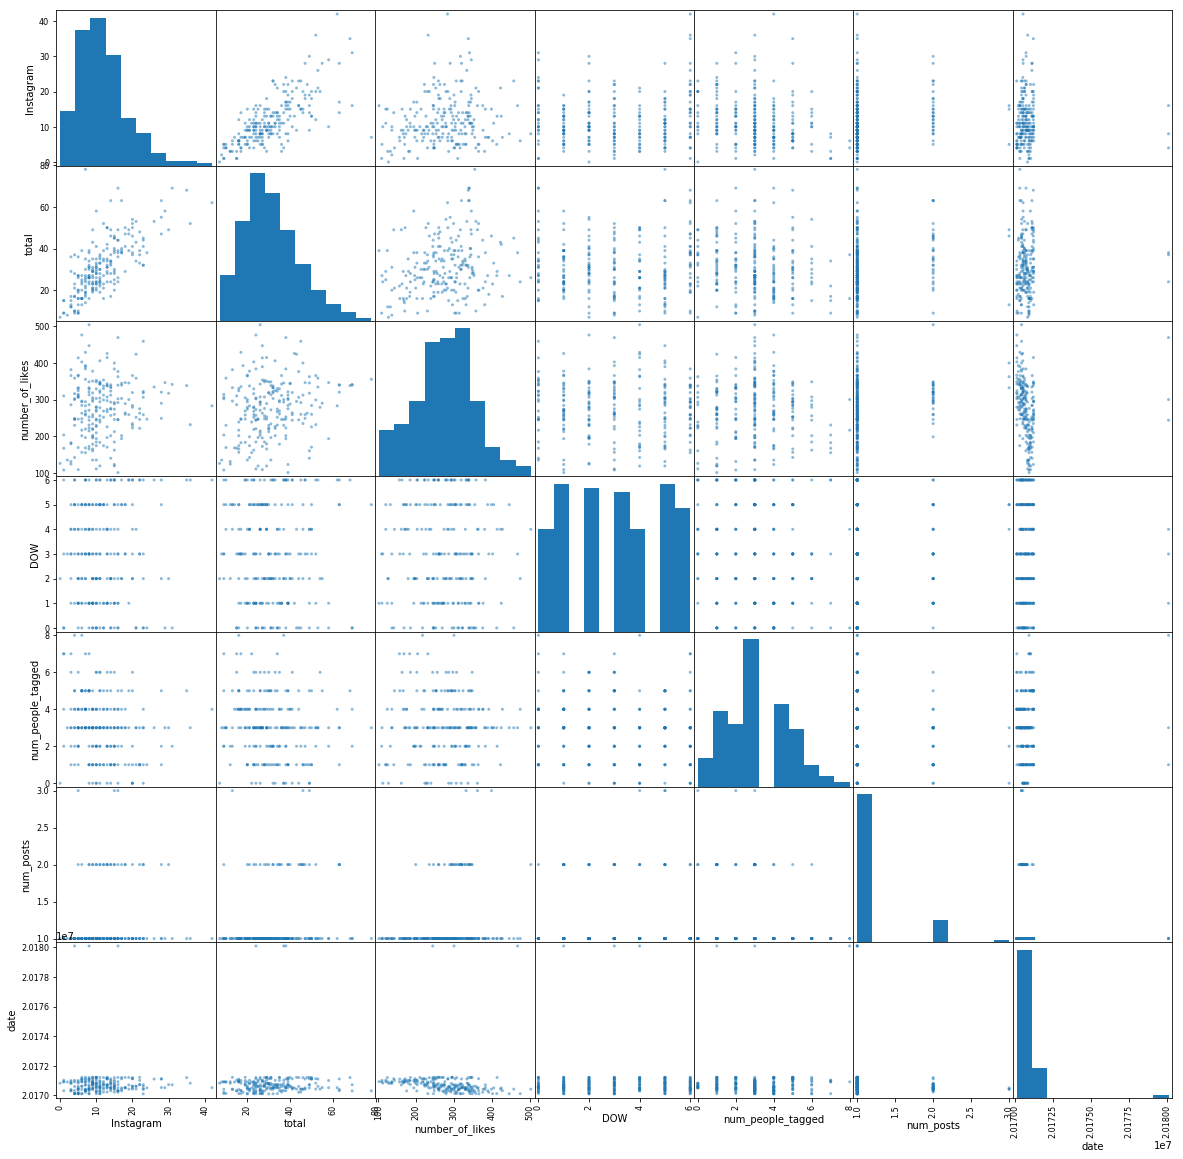

In [503]:
_=scatter_matrix(days_with_posts[['Instagram','total','number_of_likes','DOW','num_people_tagged','num_posts','date']], figsize=(20,20))

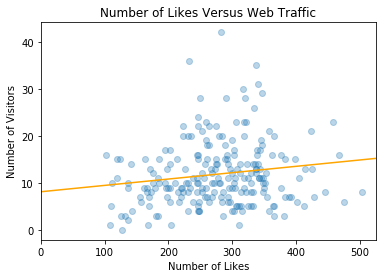

In [526]:
plt.scatter(days_with_posts['number_of_likes'], days_with_posts['Instagram'], alpha=.3)
plt.plot(x, f, color='orange')
plt.xlim(0, 525)
plt.title('Number of Likes Versus Web Traffic')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Visitors')

In [550]:
len(days_without_posts)

166

In [551]:
365-166

199

In [529]:
model2 = LinearRegression()

In [531]:
X = days_with_posts['number_of_likes']

In [532]:
X = X.as_matrix()

In [544]:
y= days_with_posts['Instagram']
y= y.as_matrix()

In [545]:
model2.fit(X.reshape(-1, 1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [533]:
model.fit(X.reshape(-1, 1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [517]:
x= np.linspace(0,550, 100)

In [540]:
model.coef_*100 

array([3.87609756])

In [547]:
model2.coef_ *100

array([1.35030985])

In [536]:
model.

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [460]:
yr2017.head()

,Instagram,total,number_of_likes,DOW,num_people_tagged,num_posts,date,no_posts,per_pushed_by_Insta
20170101,4.0,13.0,0.0,0.0,0.0,0.0,20170101,True,0.307692
20170102,3.0,19.0,0.0,0.0,0.0,0.0,20170102,True,0.157895
20170103,2.0,15.0,0.0,0.0,0.0,0.0,20170103,True,0.133333
20170104,23.0,32.0,318.0,2.0,4.0,1.0,20170104,False,0.718750
20170105,11.0,30.0,348.0,3.0,6.0,1.0,20170105,False,0.366667


In [414]:
def find_days_since(date):
    year = str(date)[:5]
    if year = 
    month = str(date)[5:7]
    month = str(date)[5:7]

'344'

In [383]:
['days_since_sept_11_2015'] = 

In [421]:
with_traffic['no_posts'] = with_traffic['num_posts'] == 0

In [426]:
fulldata.head()

,Instagram,total,number_of_likes,DOW,num_people_tagged,num_posts,date,ind,no_posts
20151208,0.0,9.0,0.0,0.0,0.0,0.0,20151208,297,True
20151209,0.0,8.0,0.0,0.0,0.0,0.0,20151209,298,True
20151210,0.0,189.0,0.0,0.0,0.0,0.0,20151210,299,True
20151211,0.0,83.0,0.0,0.0,0.0,0.0,20151211,300,True
20151212,0.0,44.0,0.0,0.0,0.0,0.0,20151212,301,True


In [436]:
posts_or_no = fulldata[['no_posts', 'total', 'Instagram']]

In [439]:
posts_or_no['per_pushed_by_Insta'] = posts_or_no['Instagram']/ posts_or_no['total']

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [449]:
posts_or_no.iloc[165:]

,no_posts,total,Instagram,per_pushed_by_Insta
20160521,True,5.0,0.0,0.000000
20160522,True,9.0,0.0,0.000000
20160523,True,14.0,1.0,0.071429
20160524,False,11.0,0.0,0.000000
20160525,True,6.0,0.0,0.000000
20160526,True,9.0,0.0,0.000000
20160527,False,8.0,0.0,0.000000
20160528,True,8.0,0.0,0.000000
20160529,True,7.0,0.0,0.000000
20160530,False,6.0,0.0,0.000000


In [437]:
posted = posts_or_no[posts_or_no['no_posts']==False]
didnt_post = posts_or_no[posts_or_no['no_posts']==True]

In [430]:
import scipy.stats as scs

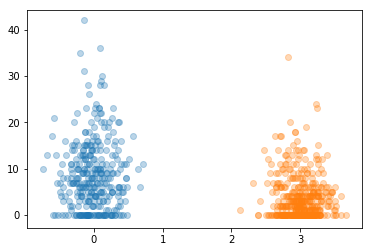

In [438]:
fig, ax = plt.subplots()
ax.scatter(scs.norm.rvs(size = len(posted), scale = .25),posted['Instagram'], alpha=.3)
ax.scatter(scs.norm.rvs(size = len(didnt_post), scale=.25, loc = 3),didnt_post['Instagram'], alpha=.3)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

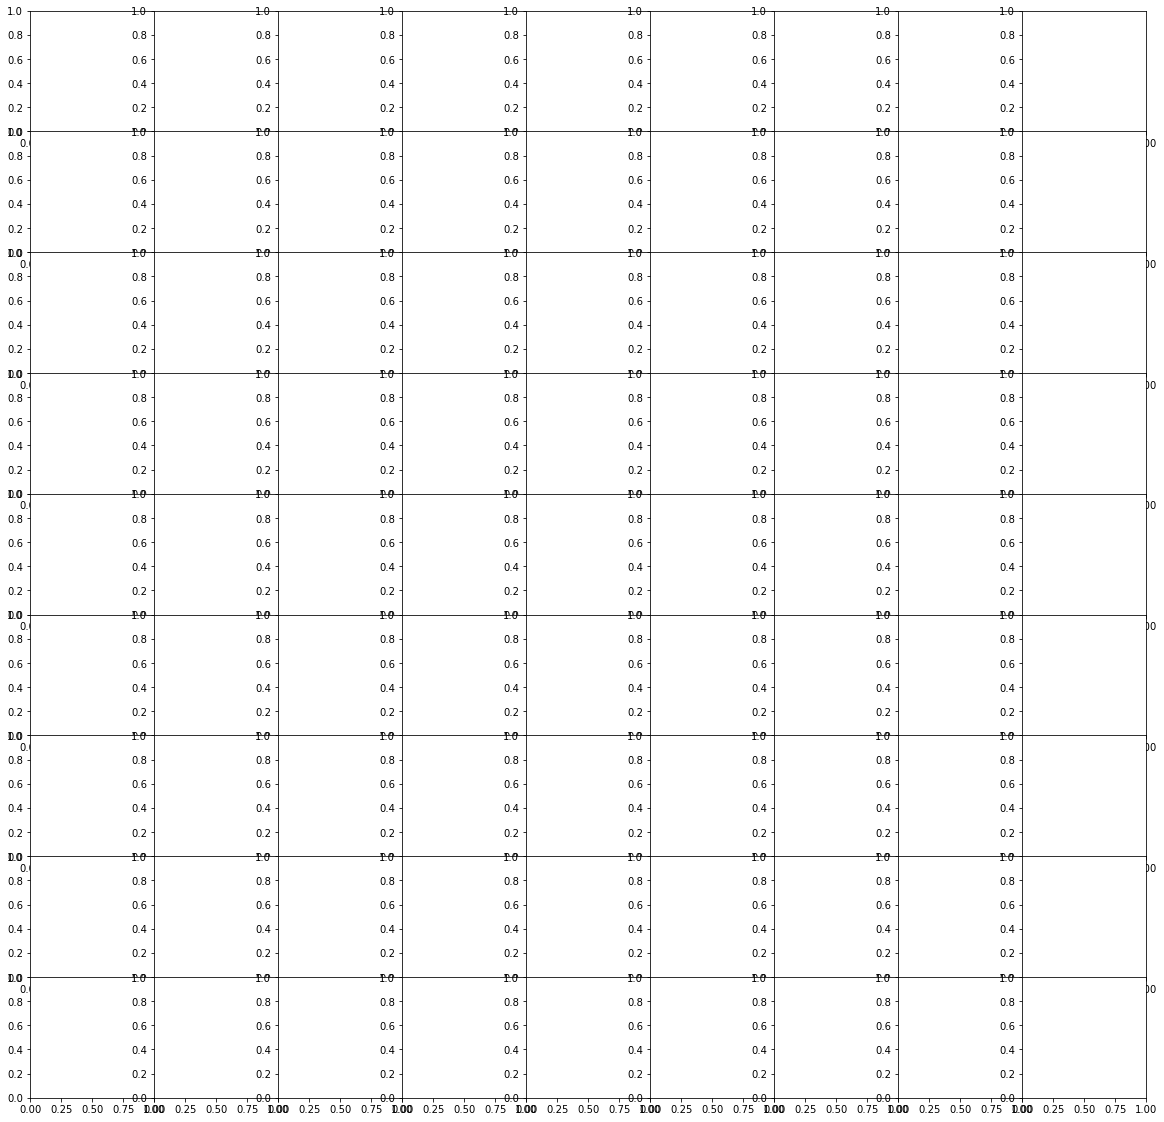

In [425]:
_= scatter_matrix(fulldata, figsize = (20,20))